In [78]:
import pandas as pd 
import numpy as np

import sbmlcore
import pytest

import warnings
warnings.filterwarnings('ignore')

Load WHO data

In [79]:
WHO_data = pd.read_csv('data/NC_000962.3_WHO-UCN-GTB-PCI-2021.7_v1.0_GARC1_RFUS.csv')
WHO_data.MUTATION
result = ['gyr' in row for row in WHO_data['MUTATION']]
WHO_data = WHO_data[result & (WHO_data['PREDICTION'] != 'F') & (WHO_data['PREDICTION'] != 'U')]
WHO_data

,Unnamed: 0.1,GENBANK_REFERENCE,CATALOGUE_NAME,CATALOGUE_VERSION,CATALOGUE_GRAMMAR,PREDICTION_VALUES,DRUG,MUTATION,PREDICTION,SOURCE,EVIDENCE,OTHER,Unnamed: 0
1178,645,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,LEV,gyrA@A90V,R,{},"{""Present_SOLO_R"": 590, ""Present_SOLO_SR"": 658...","{""FINAL_CONFIDENCE_GRADING"": ""1) Assoc w R""}",NaN
1179,646,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,MXF,gyrA@A90V,R,{},"{""Present_SOLO_R"": 253, ""Present_SOLO_SR"": 598...","{""FINAL_CONFIDENCE_GRADING"": ""1) Assoc w R""}",NaN
1180,647,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,LEV,gyrA@D94A,R,{},"{""Present_SOLO_R"": 181, ""Present_SOLO_SR"": 207...","{""FINAL_CONFIDENCE_GRADING"": ""1) Assoc w R""}",NaN
1181,648,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,MXF,gyrA@D94A,R,{},"{""Present_SOLO_R"": 89, ""Present_SOLO_SR"": 187,...","{""FINAL_CONFIDENCE_GRADING"": ""1) Assoc w R""}",NaN
1182,649,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,LEV,gyrA@D94G,R,{},"{""Present_SOLO_R"": 1133, ""Present_SOLO_SR"": 11...","{""FINAL_CONFIDENCE_GRADING"": ""1) Assoc w R""}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,731,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,MXF,gyrB@c-165t,S,{},"{""Present_SOLO_R"": 2, ""Present_SOLO_SR"": 333, ...","{""FINAL_CONFIDENCE_GRADING"": ""5) Not assoc w R""}",NaN
2126,1593,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,LEV,gyrA@*=,S,{},{},{},NaN
2131,1598,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,MXF,gyrA@*=,S,{},{},{},NaN
2136,1603,NC_000962.3,WHO-UCN-GTB-PCI-2021.7,1.0,GARC1,RFUS,LEV,gyrB@*=,S,{},{},{},NaN


Load MIC (continous, but also binary available) phenotypic data from CRyPTIC table

In [80]:
PHENOTYPES = pd.read_pickle('data/UKMYC_PHENOTYPES.pkl.gz')
PHENOTYPES.reset_index(inplace = True)
PHENOTYPES.set_index('UNIQUEID', inplace = True)
PHENOTYPES = PHENOTYPES[(PHENOTYPES.DRUG == 'LEV') | (PHENOTYPES.DRUG == 'MXF')]
PHENOTYPES

,DRUG,PLATEDESIGN,BELONGS_GPI,SITEID,DILUTION,PHENOTYPE_QUALITY,READINGDAY,PRIMARY_DILUTION,PRIMARY_METHOD,AMYGDA_DILUTION,BASHTHEBUG_DILUTION,BASHTHEBUGPRO_DILUTION,PHENOTYPE_DESCRIPTION,BASHTHEBUG_NUMBER_CLASSIFICATIONS,BASHTHEBUGPRO_NUMBER_CLASSIFICATIONS,MIC,LOG2MIC,BINARY_PHENOTYPE
UNIQUEID,,,,,,,,,,,,,,,,,,
site.06.subj.06TB_1032.lab.06MIL2037.iso.1,MXF,UKMYC6,True,06,3.0,HIGH,14,3.0,VZ,3.0,8.0,NaN,"VZ,IM AGREE",11.0,NaN,0.25,-2.00,S
site.06.subj.06TB_0404.lab.06MIL1373.iso.1,MXF,UKMYC6,True,06,3.0,HIGH,21,3.0,VZ,3.0,8.0,NaN,"VZ,IM AGREE",11.0,NaN,0.25,-2.00,S
site.02.subj.1518.lab.2013102308.iso.1,LEV,UKMYC6,False,02,3.0,LOW,14,3.0,VZ,2.0,4.0,3.0,ALL DISAGREE,11.0,3.0,0.5,-1.00,S
site.06.subj.SSM_0197-R.lab.06MIL0117.iso.1,MXF,UKMYC5,True,06,1.0,HIGH,14,1.0,VZ,1.0,8.0,NaN,"VZ,IM AGREE",11.0,NaN,<=0.06,-4.06,S
site.06.subj.06TB_1545.lab.06MIL2824.iso.1,MXF,UKMYC6,True,06,2.0,LOW,14,2.0,VZ,4.0,8.0,4.0,ALL DISAGREE,11.0,3.0,0.12,-3.06,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.02.subj.0016.lab.2014231005.iso.1,LEV,UKMYC5,True,02,2.0,HIGH,14,2.0,VZ,2.0,2.0,NaN,"VZ,IM AGREE",11.0,NaN,0.25,-2.00,S
site.05.subj.CA-0547.lab.CO-11838-18.iso.1,LEV,UKMYC6,False,05,3.0,HIGH,14,3.0,VZ,3.0,3.0,NaN,"VZ,IM AGREE",11.0,NaN,0.5,-1.00,S
site.03.subj.GB-90840137.lab.IML-01497.iso.1,LEV,UKMYC6,False,03,2.0,LOW,14,2.0,VZ,1.0,5.0,2.0,ALL DISAGREE,11.0,3.0,0.25,-2.00,S


Load metadata from genomes table (lineage and site)

In [81]:
METADATA = pd.read_pickle('data/GENOMES.pkl.gz')
METADATA = METADATA['LINEAGE_NAME']
METADATA

UNIQUEID
site.02.subj.0958.lab.22A197.iso.1                        Lineage 2
site.02.subj.0823.lab.2013241494.iso.1                    Lineage 4
site.02.subj.0359.lab.222018-14.iso.1                     Lineage 2
site.02.subj.0224.lab.2013221088.iso.1                    Lineage 2
site.02.subj.0918.lab.22A153.iso.1                        Lineage 2
                                                            ...    
site.10.subj.YA00023171.lab.YA00023171.iso.1              Lineage 4
site.10.subj.SADH00634109_S16.lab.DH00634109_S16.iso.1             
site.10.subj.H37RV_SA2437.lab.H37RV_SA2437.iso.1                   
site.10.subj.YA00044774.lab.YA00044774.iso.1              Lineage 4
site.10.subj.YA00166043.lab.YA00166043.iso.1              Lineage 2
Name: LINEAGE_NAME, Length: 77860, dtype: category
Categories (7, object): ['', 'Lineage 1', 'Lineage 2', 'Lineage 3', 'Lineage 4', 'Lineage 5', 'Lineage 6']

Load mutation data for gyrA/B genes from CRyPTIC data

In [82]:
MUTATIONS = pd.read_pickle('data/MUTATIONS_SAMPLE.pkl.gz')
MUTATIONS = MUTATIONS.reset_index()
MUTATIONS.set_index('UNIQUEID', inplace = True)

#R463L is a known phylogenetic marker for Beijing lineage
MUTATIONS = MUTATIONS[(~MUTATIONS.IS_NULL) & (MUTATIONS.IS_FILTER_PASS) & (~MUTATIONS.IS_HET) & (MUTATIONS.IS_SNP) \
                    & (MUTATIONS.IN_CDS) & (MUTATIONS.GENE == 'katG') & (MUTATIONS.IS_NONSYNONYMOUS) & (~(MUTATIONS.MUTATION == 'R463L'))]
MUTATIONS

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,...,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.02.subj.0122.lab.22A076.iso.1,katG,P232A,232.0,232.0,NaN,NaN,ccg,gcg,True,False,...,False,False,True,GENE,AAM,NaN,,,02,1
site.05.subj.LR-3059.lab.CR-00865-16.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,...,False,False,True,GENE,AAM,NaN,,,05,1
site.05.subj.LR-2342.lab.FN-01704-18.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,...,False,False,True,GENE,AAM,NaN,,,05,1
site.05.subj.LI2163509.lab.14722_6_94.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,...,False,False,True,GENE,AAM,NaN,,,05,1
site.05.subj.LI2149109.lab.14893_2_65.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,...,False,False,True,GENE,AAM,NaN,,,05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.10.subj.YA00127822.lab.YA00127822.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,...,False,False,True,GENE,AAM,NaN,,,10,1
site.10.subj.PL00350106.lab.PL00350106.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,...,False,False,True,GENE,AAM,NaN,,,10,1
site.10.subj.YA00024313.lab.YA00024313.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,...,False,False,True,GENE,AAM,NaN,,,10,1


In [83]:
#read in mutations (pre-filtered for gyrA/B mutations due to size of mutations data file)
MUTATIONS = pd.read_csv('data/MUTATIONS-gyrA_B.csv.gz', compression='gzip', header = None)

#restore header through shortened mutations file
HEADER = pd.read_pickle('data/MUTATIONS_SAMPLE.pkl.gz', compression='gzip')

HEADER.reset_index(inplace = True)
HEADER = HEADER.columns.to_list()
MUTATIONS.columns = HEADER

#remove non-synonymous, promoter and mutations with inconclusive sequencing, as well as indels
MUTATIONS = MUTATIONS[(~MUTATIONS.IS_SYNONYMOUS) & (~MUTATIONS.IN_PROMOTER) & (MUTATIONS.IS_SNP) & (~MUTATIONS.IS_NULL) & (MUTATIONS.IS_FILTER_PASS)]
MUTATIONS['GENE_MUTATION'] = MUTATIONS['GENE'] + '_' + MUTATIONS['MUTATION']

#label lineage mutations
#ref for lineage mutations: Miotto ERJ 2017
LINEAGE_MUTATIONS=['gyrA_S95T','gyrA_E21Q','gyrA_T80A','gyrA_A90G','gyrA_G247S','gyrA_A384V',
             'gyrA_G668D','gyrA_L712V', 'gyrA_S250A','gyrA_R252L','gyrA_L398F','gyrA_A463S','gyrA_D639A','gyrA_V742L',
              'gyrB_V301L','gyrB_M291I','gyrB_A403S']
MUTATIONS['LINEAGE_MUTATION'] = MUTATIONS.GENE_MUTATION.isin(LINEAGE_MUTATIONS)

#record how many mutations we see for each sample per UNIQUEID -> we can only perform mutation based approach for samples with < 2 non-lineage mutations in pncA
MUTATIONS.set_index('UNIQUEID', inplace = True)

number_mutations = MUTATIONS[MUTATIONS.LINEAGE_MUTATION == False].index.value_counts()
number_mutations.name = 'MUTATION_COUNT'
MUTATIONS = MUTATIONS.join(number_mutations.to_frame())

print("Out of the", len(MUTATIONS[(MUTATIONS.LINEAGE_MUTATION == False)]), 
      "samples with non-lineage mutations in gyrA/B", 
      len(MUTATIONS[(MUTATIONS.LINEAGE_MUTATION == False) & (MUTATIONS.MUTATION_COUNT < 2)]), 
          "show only one such mutation per sample")

Out of the 5063 samples with non-lineage mutations in gyrA/B 3974 show only one such mutation per sample


In [84]:
#amount of eligible samples where phenotypic data is available
print("Good-quality Phenotypic data is available for", len(PHENOTYPES[PHENOTYPES.index.isin(MUTATIONS[(MUTATIONS.LINEAGE_MUTATION == False) 
                                                                                         & (MUTATIONS.MUTATION_COUNT < 2) ].index.to_list()) 
                                                                      & (PHENOTYPES.PHENOTYPE_QUALITY!='LOW')].index.unique()),
      "of samples that show only one non-lineage mutation per sample in gyrA/B")

Good-quality Phenotypic data is available for 2441 of samples that show only one non-lineage mutation per sample in gyrA/B


Remove low quality phenotypes and divide data by drug (LEV, MXF)

In [85]:
LEV_PHENOTYPES = PHENOTYPES[(PHENOTYPES.index.isin(MUTATIONS[(MUTATIONS.LINEAGE_MUTATION == False) 
                                           & (MUTATIONS.MUTATION_COUNT < 2)].index.to_list())) 
           & (PHENOTYPES.DRUG == 'LEV') & (PHENOTYPES.PHENOTYPE_QUALITY!='LOW')]
LEV_PHENOTYPES.BINARY_PHENOTYPE.value_counts()

BINARY_PHENOTYPE
R    1236
S     903
I       0
Name: count, dtype: int64

In [86]:
MXF_PHENOTYPES = PHENOTYPES[(PHENOTYPES.index.isin(MUTATIONS[(MUTATIONS.LINEAGE_MUTATION == False) 
                                           & (MUTATIONS.MUTATION_COUNT < 2)].index.to_list())) 
           & (PHENOTYPES.DRUG == 'MXF') & (PHENOTYPES.PHENOTYPE_QUALITY!='LOW')]
MXF_PHENOTYPES.BINARY_PHENOTYPE.value_counts()

BINARY_PHENOTYPE
R    1031
S     981
I       0
Name: count, dtype: int64

Join the mutations data with the phenotypic data frame for both drugs

In [87]:
MUTATIONS = MUTATIONS[(MUTATIONS.LINEAGE_MUTATION == False) & (MUTATIONS.MUTATION_COUNT < 2)]

LEV_CRyPTIC = pd.merge(LEV_PHENOTYPES, MUTATIONS, how = 'left', on = 'UNIQUEID')
#LEV_CRyPTIC = pd.merge(LEV_CRyPTIC, METADATA, how = 'left', on = 'UNIQUEID')
LEV_CRyPTIC = LEV_CRyPTIC[['DRUG', 'MIC', 'LOG2MIC', 'BINARY_PHENOTYPE', 'PHENOTYPE_QUALITY', 'GENE', 'MUTATION', 'POSITION', 'GENE_MUTATION']]
LEV_CRyPTIC

,DRUG,MIC,LOG2MIC,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,GENE,MUTATION,POSITION,GENE_MUTATION
UNIQUEID,,,,,,,,,
site.06.subj.06TB_0027.lab.06MIL0488.iso.1,LEV,2.0,1.0,R,MEDIUM,gyrA,A90V,90.0,gyrA_A90V
site.06.subj.06TB_0843.lab.06MIL1790.iso.1,LEV,>8,4.0,R,HIGH,gyrA,D94Y,94.0,gyrA_D94Y
site.04.subj.00624.lab.709302.iso.1,LEV,>8,4.0,R,HIGH,gyrA,D94N,94.0,gyrA_D94N
site.11.subj.XTB-18-196.lab.XTB-18-196.iso.1,LEV,2.0,1.0,R,MEDIUM,gyrB,N499D,499.0,gyrB_N499D
site.10.subj.YA00021495.lab.YA00021495.iso.1,LEV,0.5,-1.0,S,HIGH,gyrA,N193S,193.0,gyrA_N193S
...,...,...,...,...,...,...,...,...,...
site.10.subj.XD02435891.lab.XD02435891.iso.1,LEV,8.0,3.0,R,HIGH,gyrA,D94N,94.0,gyrA_D94N
site.02.subj.0482.lab.235081-14.iso.1,LEV,1.0,0.0,S,HIGH,gyrB,G512R,512.0,gyrB_G512R
site.05.subj.LR-2321.lab.FN-01077-18.iso.1,LEV,>8,4.0,R,HIGH,gyrA,G88C,88.0,gyrA_G88C


In [88]:
MXF_CRyPTIC = pd.merge(MXF_PHENOTYPES, MUTATIONS, how = 'left', on = 'UNIQUEID')
#MXF_CRyPTIC = pd.merge(MXF_CRyPTIC, METADATA, how = 'left', on = 'UNIQUEID')
MXF_CRyPTIC = MXF_CRyPTIC[['DRUG', 'MIC', 'LOG2MIC', 'BINARY_PHENOTYPE', 'PHENOTYPE_QUALITY', 'GENE', 'MUTATION', 'POSITION', 'GENE_MUTATION']]
MXF_CRyPTIC

,DRUG,MIC,LOG2MIC,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,GENE,MUTATION,POSITION,GENE_MUTATION
UNIQUEID,,,,,,,,,
site.04.subj.00097.lab.633433.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,D94G,94.0,gyrA_D94G
site.10.subj.UH00935117.lab.UH00935117.iso.1,MXF,4.0,2.00,R,HIGH,gyrA,A90V,90.0,gyrA_A90V
site.11.subj.XTB-18-164.lab.XTB-18-164.iso.1,MXF,>4,3.00,R,MEDIUM,gyrA,D94N,94.0,gyrA_D94N
site.04.subj.00121.lab.633619.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,D94G,94.0,gyrA_D94G
site.14.subj.2591.lab.2591.iso.1,MXF,>4,3.00,R,HIGH,gyrA,D94N,94.0,gyrA_D94N
...,...,...,...,...,...,...,...,...,...
site.04.subj.01310.lab.724468.iso.1,MXF,1.0,0.00,S,HIGH,gyrA,S91P,91.0,gyrA_S91P
site.11.subj.XTB-18-186.lab.XTB-18-186.iso.1,MXF,2.0,1.00,R,MEDIUM,gyrA,A90V,90.0,gyrA_A90V
site.10.subj.UH01302806.lab.UH01302806.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,A90V,90.0,gyrA_A90V


In [89]:
MXF_CRyPTIC

,DRUG,MIC,LOG2MIC,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,GENE,MUTATION,POSITION,GENE_MUTATION
UNIQUEID,,,,,,,,,
site.04.subj.00097.lab.633433.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,D94G,94.0,gyrA_D94G
site.10.subj.UH00935117.lab.UH00935117.iso.1,MXF,4.0,2.00,R,HIGH,gyrA,A90V,90.0,gyrA_A90V
site.11.subj.XTB-18-164.lab.XTB-18-164.iso.1,MXF,>4,3.00,R,MEDIUM,gyrA,D94N,94.0,gyrA_D94N
site.04.subj.00121.lab.633619.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,D94G,94.0,gyrA_D94G
site.14.subj.2591.lab.2591.iso.1,MXF,>4,3.00,R,HIGH,gyrA,D94N,94.0,gyrA_D94N
...,...,...,...,...,...,...,...,...,...
site.04.subj.01310.lab.724468.iso.1,MXF,1.0,0.00,S,HIGH,gyrA,S91P,91.0,gyrA_S91P
site.11.subj.XTB-18-186.lab.XTB-18-186.iso.1,MXF,2.0,1.00,R,MEDIUM,gyrA,A90V,90.0,gyrA_A90V
site.10.subj.UH01302806.lab.UH01302806.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,A90V,90.0,gyrA_A90V


Add row for support of label based on seen label percentages (if seen once is set to support = 100%)

In [90]:
def update_binary_phenotype(row, dataset):
        
    target_string = row['GENE_MUTATION']
    
    filtered_df = dataset[dataset['GENE_MUTATION'] == target_string]
    
    if len(filtered_df) < 2:
        
        return pd.Series([row['BINARY_PHENOTYPE'], 1.0])
    
    else:
    
        most_common_value = filtered_df['BINARY_PHENOTYPE'].mode().iloc[0]
        label_support = filtered_df.BINARY_PHENOTYPE.value_counts()[most_common_value]/sum(filtered_df.BINARY_PHENOTYPE.value_counts())

        return pd.Series([most_common_value, label_support])
    

In [91]:
MXF_CRyPTIC[['CLEAN_BINARY_PHENOTYPE', 'LABEL_SUPPORT']] = MXF_CRyPTIC.apply(lambda row: update_binary_phenotype(row, MXF_CRyPTIC), axis=1)

In [92]:
LEV_CRyPTIC[['CLEAN_BINARY_PHENOTYPE', 'LABEL_SUPPORT']] = LEV_CRyPTIC.apply(lambda row: update_binary_phenotype(row, LEV_CRyPTIC), axis=1)

Check which WHO mutations are not in CRyPTIC dataset

In [93]:
WHO_list_MXF = WHO_data[WHO_data.DRUG == 'MXF'].MUTATION.unique()
WHO_list_LEV = WHO_data[WHO_data.DRUG == 'LEV'].MUTATION.unique()

In [94]:
found_strings_MXF = [string for string in WHO_list_MXF if string not in MXF_CRyPTIC.GENE_MUTATION.unique()]
found_strings_LEV = [string for string in WHO_list_LEV if string not in LEV_CRyPTIC.GENE_MUTATION.unique()]

Filter WHO data based on unseen mutations

In [95]:
MXF_WHO = WHO_data[(WHO_data.MUTATION.isin(found_strings_MXF)) & (WHO_data.DRUG == 'MXF')]
LEV_WHO = WHO_data[(WHO_data.MUTATION.isin(found_strings_LEV)) & (WHO_data.DRUG == 'LEV')]

Convert WHO data to CRyPTIC table format

In [96]:
def replace_symbol(input_string, target_symbol, replacement_symbol):
   
    modified_string = input_string.replace(target_symbol, replacement_symbol)
    
    return modified_string

def add_gene_mutation(row):

    gene = row.GENE_MUTATION[:4]
    mutation = row.GENE_MUTATION[5:]

    return pd.Series([gene, mutation])

MXF_WHO['MUTATION'] = [replace_symbol(s, '@', '_') for s in MXF_WHO.MUTATION]
MXF_WHO[['MUTATION', 'PREDICTION']]
MXF_WHO.rename(columns = {'MUTATION' : 'GENE_MUTATION', 'PREDICTION' : 'CLEAN_BINARY_PHENOTYPE'}, inplace = True)
MXF_WHO = MXF_WHO[['DRUG', 'GENE_MUTATION', 'CLEAN_BINARY_PHENOTYPE']]
MXF_WHO['LABEL_SUPPORT'] = 1
MXF_WHO[['GENE', 'MUTATION']] = MXF_WHO.apply(lambda row: add_gene_mutation(row), axis = 1)
mask = MXF_WHO['MUTATION'].str.contains('c-|=', case=False, regex=True)
MXF_WHO = MXF_WHO[~mask]
MXF_WHO

LEV_WHO['MUTATION'] = [replace_symbol(s, '@', '_') for s in LEV_WHO.MUTATION]
LEV_WHO[['MUTATION', 'PREDICTION']]
LEV_WHO.rename(columns = {'MUTATION' : 'GENE_MUTATION', 'PREDICTION' : 'CLEAN_BINARY_PHENOTYPE'}, inplace = True)
LEV_WHO = LEV_WHO[['DRUG', 'GENE_MUTATION', 'CLEAN_BINARY_PHENOTYPE']]
LEV_WHO['LABEL_SUPPORT'] = 1
LEV_WHO[['GENE', 'MUTATION']] = LEV_WHO.apply(lambda row: add_gene_mutation(row), axis = 1)
mask = LEV_WHO['MUTATION'].str.contains('c-|=', case=False, regex=True)
LEV_WHO = LEV_WHO[~mask]
LEV_WHO

,DRUG,GENE_MUTATION,CLEAN_BINARY_PHENOTYPE,LABEL_SUPPORT,GENE,MUTATION
1178,LEV,gyrA_A90V,R,1,gyrA,A90V
1180,LEV,gyrA_D94A,R,1,gyrA,D94A
1182,LEV,gyrA_D94G,R,1,gyrA,D94G
1184,LEV,gyrA_D94H,R,1,gyrA,D94H
1186,LEV,gyrA_D94N,R,1,gyrA,D94N
1188,LEV,gyrA_D94Y,R,1,gyrA,D94Y
1190,LEV,gyrA_G88A,R,1,gyrA,G88A
1192,LEV,gyrA_G88C,R,1,gyrA,G88C
1194,LEV,gyrA_S91P,R,1,gyrA,S91P
1196,LEV,gyrB_A504V,R,1,gyrB,A504V


Optionally drop rows with low label support

In [97]:
MXF_CRyPTIC = MXF_CRyPTIC[MXF_CRyPTIC.LABEL_SUPPORT > 0.50]
LEV_CRyPTIC = LEV_CRyPTIC[LEV_CRyPTIC.LABEL_SUPPORT > 0.50]

In [98]:
MXF_CRyPTIC['MUTATION']

UNIQUEID
site.04.subj.00097.lab.633433.iso.1              D94G
site.10.subj.UH00935117.lab.UH00935117.iso.1     A90V
site.11.subj.XTB-18-164.lab.XTB-18-164.iso.1     D94N
site.04.subj.00121.lab.633619.iso.1              D94G
site.14.subj.2591.lab.2591.iso.1                 D94N
                                                ...  
site.04.subj.01310.lab.724468.iso.1              S91P
site.11.subj.XTB-18-186.lab.XTB-18-186.iso.1     A90V
site.10.subj.UH01302806.lab.UH01302806.iso.1     A90V
site.05.subj.CA-0020.lab.CO-05421-18.iso.1      G594R
site.06.subj.06TB_0968.lab.06MIL1963.iso.1       A90V
Name: MUTATION, Length: 2035, dtype: object

Add segid column

In [99]:
def make_segid(row):
    return row['GENE'][3:]

MXF_CRyPTIC['segid'] = MXF_CRyPTIC.apply(make_segid, axis = 1)
MXF_CRyPTIC['mutation'] = MXF_CRyPTIC['MUTATION']
MXF_CRyPTIC.drop('MUTATION', axis = 1, inplace = True)

LEV_CRyPTIC['segid'] = LEV_CRyPTIC.apply(make_segid, axis = 1)
LEV_CRyPTIC['mutation'] = LEV_CRyPTIC['MUTATION']
LEV_CRyPTIC.drop('MUTATION', axis = 1, inplace = True)

MXF_WHO['segid'] = MXF_WHO.apply(make_segid, axis = 1)
MXF_WHO['mutation'] = MXF_WHO['MUTATION']
MXF_WHO.drop('MUTATION', axis = 1, inplace = True)

LEV_WHO['segid'] = LEV_WHO.apply(make_segid, axis = 1)
LEV_WHO['mutation'] = LEV_WHO['MUTATION']
LEV_WHO.drop('MUTATION', axis = 1, inplace = True)

For now, drop rows with mutations outside of crystallized regions, might impute values later on (segid A: 15-501, segid B: 425-675)

In [100]:
MXF_CRyPTIC = MXF_CRyPTIC[(MXF_CRyPTIC.segid == 'A') & MXF_CRyPTIC.POSITION.astype(int).isin(list(range(15,502))) 
            | (MXF_CRyPTIC.segid == 'B') & MXF_CRyPTIC.POSITION.astype(int).isin(list(range(425,676)))]

LEV_CRyPTIC = LEV_CRyPTIC[(LEV_CRyPTIC.segid == 'A') & LEV_CRyPTIC.POSITION.astype(int).isin(list(range(15,502))) 
            | (LEV_CRyPTIC.segid == 'B') & LEV_CRyPTIC.POSITION.astype(int).isin(list(range(425,676)))]

In [101]:
MXF_CRyPTIC

,DRUG,MIC,LOG2MIC,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,GENE,POSITION,GENE_MUTATION,CLEAN_BINARY_PHENOTYPE,LABEL_SUPPORT,segid,mutation
UNIQUEID,,,,,,,,,,,,
site.04.subj.00097.lab.633433.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,94.0,gyrA_D94G,R,0.818923,A,D94G
site.10.subj.UH00935117.lab.UH00935117.iso.1,MXF,4.0,2.00,R,HIGH,gyrA,90.0,gyrA_A90V,R,0.555556,A,A90V
site.11.subj.XTB-18-164.lab.XTB-18-164.iso.1,MXF,>4,3.00,R,MEDIUM,gyrA,94.0,gyrA_D94N,R,0.823529,A,D94N
site.04.subj.00121.lab.633619.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,94.0,gyrA_D94G,R,0.818923,A,D94G
site.14.subj.2591.lab.2591.iso.1,MXF,>4,3.00,R,HIGH,gyrA,94.0,gyrA_D94N,R,0.823529,A,D94N
...,...,...,...,...,...,...,...,...,...,...,...,...
site.04.subj.01310.lab.724468.iso.1,MXF,1.0,0.00,S,HIGH,gyrA,91.0,gyrA_S91P,R,0.676923,A,S91P
site.11.subj.XTB-18-186.lab.XTB-18-186.iso.1,MXF,2.0,1.00,R,MEDIUM,gyrA,90.0,gyrA_A90V,R,0.555556,A,A90V
site.10.subj.UH01302806.lab.UH01302806.iso.1,MXF,2.0,1.00,R,HIGH,gyrA,90.0,gyrA_A90V,R,0.555556,A,A90V


Join CRyPTIC and WHO datasets

In [122]:
MXF_DATASET = pd.concat([MXF_CRyPTIC, MXF_WHO], ignore_index=True)
LEV_DATASET = pd.concat([LEV_CRyPTIC, LEV_WHO], ignore_index=True)
MXF_DATASET
LEV_DATASET

,DRUG,MIC,LOG2MIC,BINARY_PHENOTYPE,PHENOTYPE_QUALITY,GENE,POSITION,GENE_MUTATION,CLEAN_BINARY_PHENOTYPE,LABEL_SUPPORT,segid,mutation
0,LEV,2.0,1.0,R,MEDIUM,gyrA,90.0,gyrA_A90V,R,0.869048,A,A90V
1,LEV,>8,4.0,R,HIGH,gyrA,94.0,gyrA_D94Y,R,0.928571,A,D94Y
2,LEV,>8,4.0,R,HIGH,gyrA,94.0,gyrA_D94N,R,0.859259,A,D94N
3,LEV,2.0,1.0,R,MEDIUM,gyrB,499.0,gyrB_N499D,R,1.000000,B,N499D
4,LEV,0.5,-1.0,S,HIGH,gyrA,193.0,gyrA_N193S,S,1.000000,A,N193S
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,LEV,NaN,NaN,NaN,NaN,gyrB,NaN,gyrB_A504V,R,1.000000,B,A504V
1761,LEV,NaN,NaN,NaN,NaN,gyrB,NaN,gyrB_D461N,R,1.000000,B,D461N
1762,LEV,NaN,NaN,NaN,NaN,gyrB,NaN,gyrB_E501D,R,1.000000,B,E501D
1763,LEV,NaN,NaN,NaN,NaN,gyrB,NaN,gyrB_E501V,R,1.000000,B,E501V


In [123]:
import MDAnalysis as mda

pdb = mda.Universe('data/pdb/MXF/5bs8.pdb')

In [124]:
protein = pdb.select_atoms("protein")
protein
#protein.write("data/5bs8_atoms.pdb") #can change this to 

<AtomGroup with 23125 atoms>

In [125]:
snap2 = pd.read_csv('data/SNAP2_complete.csv')
snap2

,Variant,Predicted Effect,Score,Expected Accuracy,segid
0,T1A,effect,25,63%,A
1,T1R,effect,57,75%,A
2,T1N,neutral,-80,87%,A
3,T1D,effect,21,63%,A
4,T1C,effect,13,59%,A
...,...,...,...,...,...
15115,V253S,effect,52,75%,B
15116,V253T,effect,30,66%,B
15117,V253W,effect,66,80%,B
15118,V253Y,effect,56,75%,B


In [126]:
def correct_position(row):
    
    if row.segid == 'A':
        increase_by = 1
    else:
        increase_by = 422

    letter1 = row.Variant[0]
    letter2 = row.Variant[-1]  # Extract the letters (all characters except the last one)
    number = int(row.Variant[1:-1])  # Extract the number and convert it to an integer
    updated_number = number + increase_by  # Increase the number by the specified amount
    updated_string = f'{letter1}{updated_number}{letter2}'  # Create the updated string

    return updated_string

In [127]:
snap2['Variant'] = snap2.apply(correct_position, axis = 1)
snap2.to_csv('data/SNAP2_complete_clean.csv', index=False)

Create features using sbml-core

In [128]:
data_dict = {}
names = ['MXF_df', 'LEV_df']
i=0

for dataset in [MXF_DATASET, LEV_DATASET]:

    sbml_dataset = dataset[['segid', 'mutation']]
    sbml_dataset.drop_duplicates(subset='mutation', keep='first', inplace=True)

    features = sbmlcore.FeatureDataset(sbml_dataset, species='M. tuberculosis', protein = 'DNA Gyrase')

    a = sbmlcore.AminoAcidVolumeChange()
    b1 = sbmlcore.AminoAcidHydropathyChangeKyteDoolittle()
    b2 = sbmlcore.AminoAcidHydropathyChangeWimleyWhite()
    c = sbmlcore.AminoAcidMWChange()
    d = sbmlcore.AminoAcidPiChange()
    e = sbmlcore.Stride('data/pdb/5bs8_atoms.pdb')
    f = sbmlcore.FreeSASA('data/pdb/5bs8_atoms.pdb')
    g = sbmlcore.SNAP2("data/SNAP2_complete_clean.csv", offsets = {'A': 0, 'B': 0})
    l = sbmlcore.TempFactors('data/pdb/5bs8_atoms.pdb')
    m = sbmlcore.ResidueDepth('data/pdb/5bs8_atoms.pdb', segids=['A', 'B'])

    print(names[i])
    if names[i] == 'MXF_df':

        h1 = sbmlcore.StructuralDistances('data/pdb/MXF/5bs8_no_PTR_su_AB_MGB.pdb', distance_selection="resname MG", distance_name='dist_MGB')
        h2 = sbmlcore.StructuralDistances('data/pdb/MXF/5bs8_no_PTR_su_AB_MGE.pdb', distance_selection="resname MG", distance_name='dist_MGE')
        # h3 = sbmlcore.StructuralDistances('data/pdb/5bs8_no_PTR_su_AB_MGE.pdb', distance_selection="resname MG", distance_name='dist_MGE')
        # h4 = sbmlcore.StructuralDistances('data/pdb/5bs8_no_PTR_su_AB_MGF.pdb', distance_selection="resname MG", distance_name='dist_MGF')
        k = sbmlcore.StructuralDistances('data/pdb/MXF/5bs8_no_PTR_su_AB_MXF_H.pdb', distance_selection="resname MFX", distance_name='dist_drug')
        #l = sbmlcore.TempFactors('data/pdb/MXF/5bs8_no_PTR.pdb')

    else:

        h1 = sbmlcore.StructuralDistances('data/pdb/LEV/5btg_no_PTR_su_AB_MGB.pdb', distance_selection="resname MG", distance_name='dist_MGB')
        h2 = sbmlcore.StructuralDistances('data/pdb/LEV/5btg_no_PTR_su_AB_MGE.pdb', distance_selection="resname MG", distance_name='dist_MGE')
        # h3 = sbmlcore.StructuralDistances('data/pdb/5btg_no_PTR_su_AB_MGE.pdb', distance_selection="resname MG", distance_name='dist_MGE')
        # h4 = sbmlcore.StructuralDistances('data/pdb/5btg_no_PTR_su_AB_MGF.pdb', distance_selection="resname MG", distance_name='dist_MGF')
        k = sbmlcore.StructuralDistances('data/pdb/LEV/5btg_no_PTR_su_AB_LEV_E.pdb', distance_selection="resname LFX", distance_name='dist_drug')
        #l = sbmlcore.TempFactors('data/pdb/LEV/5btg_no_PTR.pdb')

    features.add_feature([a, b1, b2, c, d, e, f, g, h1, h2, k, l, m])
    features = features.df

    dataset.reset_index(inplace = True)

    variable_name = names[i]
    i = i+1
    
    data_dict[variable_name] = pd.merge(dataset, features, how='left', on=['segid','mutation'])

MXF_df
LEV_df


In [129]:
df = data_dict['MXF_df']
df.columns

Index(['index', 'DRUG', 'MIC', 'LOG2MIC', 'BINARY_PHENOTYPE',
       'PHENOTYPE_QUALITY', 'GENE', 'POSITION', 'GENE_MUTATION',
       'CLEAN_BINARY_PHENOTYPE', 'LABEL_SUPPORT', 'segid', 'mutation',
       'd_volume', 'd_hydropathy_KD', 'd_hydropathy_WW', 'd_MW', 'd_Pi',
       'secondary_structure', 'secondary_structure_long', 'phi', 'psi',
       'residue_sasa', 'n_hbond_acceptors', 'n_hbond_donors', 'B', 'C', 'E',
       'G', 'H', 'T', 'SASA', 'snap2_score', 'snap2_accuracy', 'dist_MGB',
       'dist_MGE', 'dist_drug', 'temp_factor', 'depth'],
      dtype='object')

<Axes: >

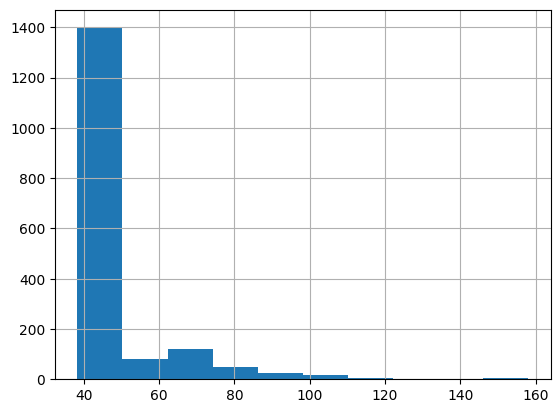

In [130]:
df.temp_factor.hist()

<Axes: >

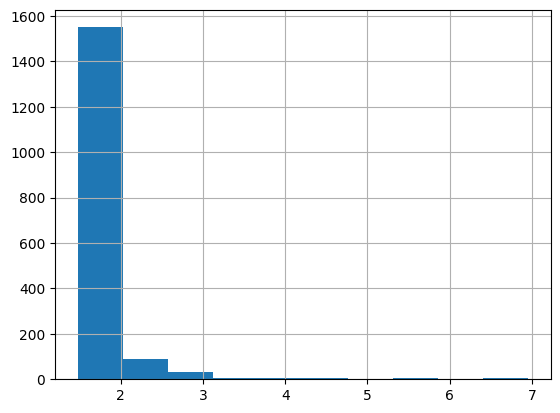

In [131]:
# df.drop_duplicates(subset=['GENE_MUTATION','LINEAGE_NAME'], keep='first', inplace=True)
# df.GENE_MUTATION.value_counts()[:20]
df.depth.hist()

<Axes: >

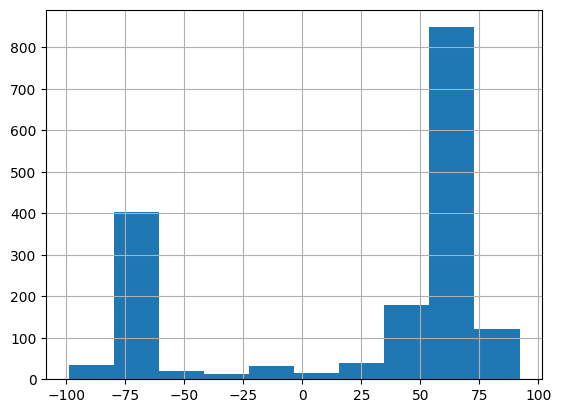

In [134]:
df.snap2_score.hist()

<Axes: >

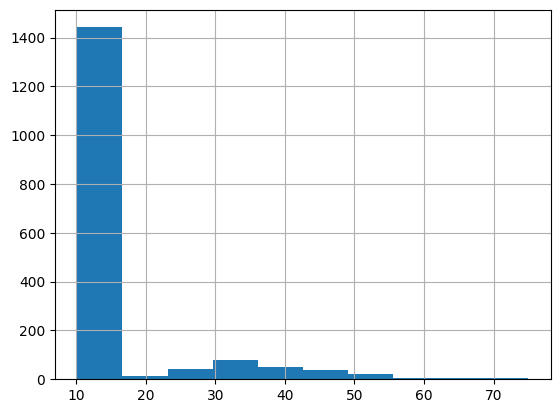

In [140]:
df.dist_drug.hist()

In [132]:
len(df.GENE_MUTATION.unique())

162

Further features to be added soon (DeepDG)

In [133]:
for dataset in ['LEV_df', 'MXF_df']:

    df = data_dict[dataset]
    print(df.info())
    
    name = f'data/ML_DATA_{dataset[:3]}.csv'
    df.to_csv(name, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     1765 non-null   int64   
 1   DRUG                      1765 non-null   object  
 2   MIC                       1710 non-null   category
 3   LOG2MIC                   1710 non-null   float64 
 4   BINARY_PHENOTYPE          1710 non-null   category
 5   PHENOTYPE_QUALITY         1723 non-null   category
 6   GENE                      1765 non-null   object  
 7   POSITION                  1723 non-null   float64 
 8   GENE_MUTATION             1765 non-null   object  
 9   CLEAN_BINARY_PHENOTYPE    1764 non-null   object  
 10  LABEL_SUPPORT             1765 non-null   float64 
 11  segid                     1765 non-null   object  
 12  mutation                  1765 non-null   object  
 13  d_volume                  1765 non-null   float6

In [590]:
df.GENE_MUTATION.value_counts()

GENE_MUTATION
gyrA_D94G     621
gyrA_A90V     338
gyrA_D94N     138
gyrA_D94A      88
gyrA_S91P      67
             ... 
gyrA_T230S      1
gyrA_V235A      1
gyrB_L638V      1
gyrA_S411A      1
gyrB_V301L      1
Name: count, Length: 162, dtype: int64